In [47]:
import numpy as np
import pickle
import time
import lzma
import sys
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})

plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [2]:
os.chdir("../")
import cpt_optimisation

In [42]:
community_size   = []
community_degree = []
community_count  = []


for i,f in enumerate(os.listdir("sda_graphs/")):
    
    if i % 204 == 0:
        print(i/20480)
    
    with open(f"sda_graphs/{f}", "rb") as f: 
        _, community_membership, augmented_communities, _ = pickle.load(f)
        
    # how many communities are there?
    community_count.append(len(augmented_communities))
    
    # how many agents are there in each community?
    for _, c in augmented_communities.items():
        community_size.append(len(c))
        
    # how many communities is each community connected to?
    for _, agents in augmented_communities.items():
        neighbouring_comms = set()
        for a in agents:
            for c in community_membership[a]:
                neighbouring_comms.add(c)
        
        community_degree.append(len(neighbouring_comms))

0.0
0.0099609375
0.019921875
0.0298828125
0.03984375
0.0498046875
0.059765625
0.0697265625
0.0796875
0.0896484375
0.099609375
0.1095703125
0.11953125
0.1294921875
0.139453125
0.1494140625
0.159375
0.1693359375
0.179296875
0.1892578125
0.19921875
0.2091796875
0.219140625
0.2291015625
0.2390625
0.2490234375
0.258984375
0.2689453125
0.27890625
0.2888671875
0.298828125
0.3087890625
0.31875
0.3287109375
0.338671875
0.3486328125
0.35859375
0.3685546875
0.378515625
0.3884765625
0.3984375
0.4083984375
0.418359375
0.4283203125
0.43828125
0.4482421875
0.458203125
0.4681640625
0.478125
0.4880859375
0.498046875
0.5080078125
0.51796875
0.5279296875
0.537890625
0.5478515625
0.5578125
0.5677734375
0.577734375
0.5876953125
0.59765625
0.6076171875
0.617578125
0.6275390625
0.6375
0.6474609375
0.657421875
0.6673828125
0.67734375
0.6873046875
0.697265625
0.7072265625
0.7171875
0.7271484375
0.737109375
0.7470703125
0.75703125
0.7669921875
0.776953125
0.7869140625
0.796875
0.8068359375
0.816796875
0.8267578

In [43]:
with open("sda_graph_distributions_data.pickle", "wb") as f:
    pickle.dump({
        "size":community_size,
        "degree":community_degree,
        "count":community_count
    }, f)

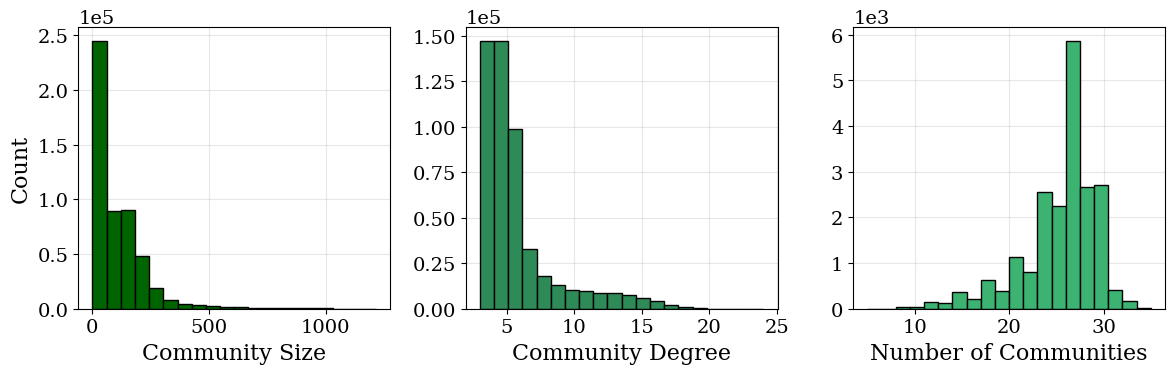

In [69]:
fig, axs = plt.subplots(1, 3, figsize=(12,4))

axs[0].hist(community_size, edgecolor="k", bins=20, color="darkgreen")
axs[0].set_xlabel("Community Size")
axs[0].set_ylabel("Count")

axs[1].hist(community_degree, edgecolor="k", bins=20, color="seagreen")
axs[1].set_xlabel("Community Degree")

axs[2].hist(community_count, edgecolor="k", bins=20, color="mediumseagreen")
axs[2].set_xlabel("Number of Communities")

axs[0].ticklabel_format(axis='y', style='sci', scilimits=(5,4))
axs[1].ticklabel_format(axis='y', style='sci', scilimits=(5,4))
axs[2].ticklabel_format(axis='y', style='sci', scilimits=(3,4))


fig.tight_layout()
plt.savefig("sda_graph_distributions.pdf", bbox_inches="tight")
plt.show()

In [73]:
np.median(community_count)

26.0